In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 

In [4]:
df = pd.read_csv("HW9_LoansData.csv")
df.head()

/var/folders/l0/rswxq5r17tg_xh8mp8pj68mh0000gn/T/ipykernel_26922/2247868516.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HW9_LoansData.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000,15000,15000,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400,10400,10400,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425,21425,21425,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800,12800,12800,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650,7650,7650,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['loan_status'].value_counts(dropna=False)

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

In [6]:
df=df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df['loan_status'].value_counts(dropna=False, normalize=True)

Fully Paid     0.812441
Charged Off    0.187559
Name: loan_status, dtype: float64

In [7]:
df['charged_off']=df['loan_status'].map(lambda x: 1 if 'Charged Off' in x else 0)
df['charged_off'].describe()

count    86138.000000
mean         0.187559
std          0.390362
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: charged_off, dtype: float64

In [8]:
df.drop('loan_status', axis=1, inplace=True)

In [9]:
missing_frac=df.isnull().mean().sort_values(ascending=False)
drop_list=sorted(list(missing_frac[missing_frac>0.3].index))
df.drop(labels=drop_list, axis=1, inplace=True)
df.shape

(86138, 92)

In [10]:
keep_list=['charged_off', 'funded_amnt', 'annual_inc', 'dti', 'earliest_cr_line', \
          'fico_range_high', 'home_ownership', 'installment', 'int_rate', 'term', \
          'loan_amnt', 'grade', 'sub_grade', 'last_pymnt_amnt', 'avg_cur_bal', 'acc_open_past_24mths']
df=df[keep_list]
df.head()

,charged_off,funded_amnt,annual_inc,dti,earliest_cr_line,fico_range_high,home_ownership,installment,int_rate,term,loan_amnt,grade,sub_grade,last_pymnt_amnt,avg_cur_bal,acc_open_past_24mths
0,0,15000,78000.0,12.03,Aug-94,754,RENT,336.64,12.39,60 months,15000,C,C1,12017.81,29828,5
1,1,10400,58000.0,14.92,Sep-89,714,MORTGAGE,321.08,6.99,36 months,10400,A,A3,321.08,9536,7
2,0,21425,63800.0,18.49,Aug-03,689,RENT,516.36,15.59,60 months,21425,D,D1,17813.19,4232,4
4,1,7650,50000.0,34.81,Aug-02,689,RENT,260.20,13.66,36 months,7650,C,C3,17.70,5857,6
5,0,9600,69000.0,25.81,Nov-92,684,RENT,326.53,13.66,36 months,9600,C,C3,9338.58,3214,8


In [11]:
corr=df.corr()
corr

,charged_off,funded_amnt,annual_inc,dti,fico_range_high,installment,int_rate,loan_amnt,last_pymnt_amnt,avg_cur_bal,acc_open_past_24mths
charged_off,1.000000,0.060818,-0.050349,0.123108,-0.121891,0.032847,0.282825,0.060818,-0.319081,-0.071977,0.105989
funded_amnt,0.060818,1.000000,0.375339,0.004018,0.145427,0.956720,0.081992,1.000000,0.483553,0.249609,-0.002055
annual_inc,-0.050349,0.375339,1.000000,-0.211716,0.103118,0.368550,-0.116058,0.375339,0.199016,0.372657,0.041771
dti,0.123108,0.004018,-0.211716,1.000000,-0.065497,0.005816,0.203275,0.004018,-0.048400,-0.139358,0.165314
fico_range_high,-0.121891,0.145427,0.103118,-0.065497,1.000000,0.105178,-0.387204,0.145427,0.103165,0.148058,-0.110641
installment,0.032847,0.956720,0.368550,0.005816,0.105178,1.000000,0.078197,0.956720,0.397907,0.226755,0.007955
int_rate,0.282825,0.081992,-0.116058,0.203275,-0.387204,0.078197,1.000000,0.081992,0.099688,-0.097410,0.225447
loan_amnt,0.060818,1.000000,0.375339,0.004018,0.145427,0.956720,0.081992,1.000000,0.483553,0.249609,-0.002055
last_pymnt_amnt,-0.319081,0.483553,0.199016,-0.048400,0.103165,0.397907,0.099688,0.483553,1.000000,0.178699,0.036069
avg_cur_bal,-0.071977,0.249609,0.372657,-0.139358,0.148058,0.226755,-0.097410,0.249609,0.178699,1.000000,-0.100472


In [12]:
corr_chagedoff=abs(corr['charged_off'])
drop_list_corr=sorted(list(corr_chagedoff[corr_chagedoff<0.10].index))
print(drop_list_corr)

['annual_inc', 'avg_cur_bal', 'funded_amnt', 'installment', 'loan_amnt']


In [13]:
df.drop(labels=drop_list_corr, axis=1, inplace=True)
df.shape

(86138, 11)

In [14]:
df['term'].value_counts()

 36 months    67507
 60 months    18631
Name: term, dtype: int64

In [15]:
df['term']=df['term'].map(lambda x: 36 if '36 months' in x else 60)
df.groupby('term')['charged_off'].value_counts(normalize=True).loc[:,1]

term
36    0.141526
60    0.354356
Name: charged_off, dtype: float64

<AxesSubplot:xlabel='grade'>

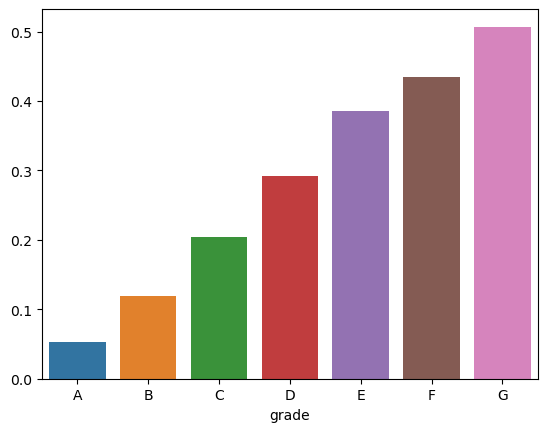

In [16]:
chargeoff_rate_g=df.groupby('grade')['charged_off'].value_counts(normalize=True).loc[:,1]
sns.barplot(x=chargeoff_rate_g.index, y=chargeoff_rate_g.values)

<AxesSubplot:xlabel='sub_grade'>

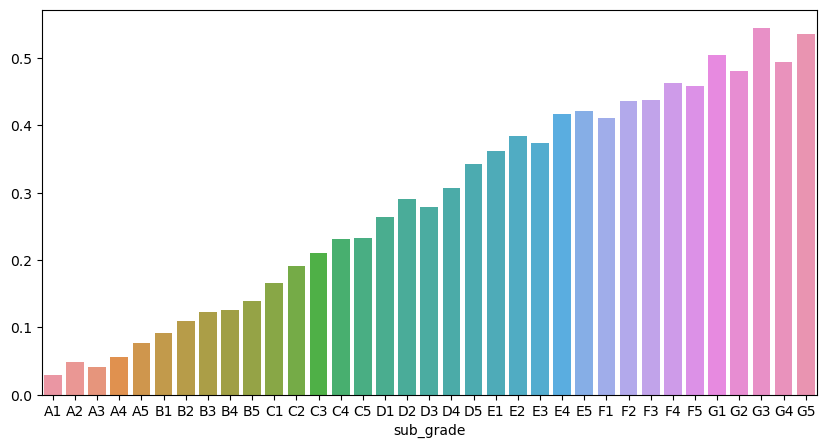

In [17]:
chargeoff_rate_sg=df.groupby('sub_grade')['charged_off'].value_counts(normalize=True).loc[:,1]
plt.figure(figsize=(10,5))
sns.barplot(x=chargeoff_rate_sg.index, y=chargeoff_rate_sg.values)

In [18]:
df.drop(['grade'], axis=1, inplace=True)
df.shape

(86138, 10)

In [19]:
df.sub_grade.describe()

count     86138
unique       35
top          C1
freq       5217
Name: sub_grade, dtype: object

In [20]:
cat_mask=df.dtypes==object

# Filter categorical columns using the mask and turn them into a list:
cat_cols=df.columns[cat_mask].tolist()
cat_cols

['earliest_cr_line', 'home_ownership', 'sub_grade']

In [21]:
df['home_ownership_code']=LabelEncoder().fit_transform(df.home_ownership)
df['sub_grade_code']=LabelEncoder().fit_transform(df.sub_grade)
df.describe()

,charged_off,dti,fico_range_high,int_rate,term,last_pymnt_amnt,acc_open_past_24mths,home_ownership_code,sub_grade_code
count,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000
mean,0.187559,18.532747,696.463024,13.002360,41.191019,4757.453184,4.594732,1.925318,10.747127
std,0.390362,8.538247,29.731848,4.397419,9.881240,6466.767327,3.070996,0.943402,6.678662
min,0.000000,0.000000,664.000000,6.000000,36.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.070000,674.000000,9.490000,36.000000,358.522500,2.000000,1.000000,6.000000
50%,0.000000,17.950000,689.000000,12.990000,36.000000,1241.230000,4.000000,2.000000,10.000000
75%,0.000000,24.500000,709.000000,15.610000,36.000000,7303.205000,6.000000,3.000000,15.000000
max,1.000000,39.990000,850.000000,26.060000,60.000000,36234.440000,53.000000,3.000000,34.000000


In [22]:
df.drop(cat_cols, axis=1, inplace=True)
df.shape

(86138, 9)

In [23]:
df.head()

,charged_off,dti,fico_range_high,int_rate,term,last_pymnt_amnt,acc_open_past_24mths,home_ownership_code,sub_grade_code
0,0,12.03,754,12.39,60,12017.81,5,3,10
1,1,14.92,714,6.99,36,321.08,7,1,2
2,0,18.49,689,15.59,60,17813.19,4,3,15
4,1,34.81,689,13.66,36,17.70,6,3,12
5,0,25.81,684,13.66,36,9338.58,8,3,12


In [24]:
y = df['charged_off']
x = df.loc[:, df.columns != 'charged_off']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=666)
y_test.sample(3)

1681     0
55818    0
21667    1
Name: charged_off, dtype: int64

In [25]:
SVC = SVC(kernel='rbf', C=10, class_weight='balanced', random_state=666) 
SVC.fit(x_train, y_train)

SVC(C=10, class_weight='balanced', random_state=666)

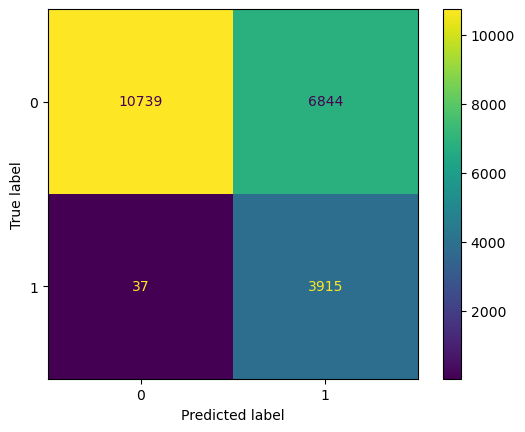

In [26]:
ConfusionMatrixDisplay.from_estimator(SVC, x_test, y_test)

In [27]:
df['charged_off'].value_counts()

0    69982
1    16156
Name: charged_off, dtype: int64

In [28]:
y0 = df[df['charged_off']==0]
y1 = df[df['charged_off']==1]
subset_y0 = y0.sample(n=15000)
subset_y1 = y1.sample(n=15000)
df2 = pd.concat([subset_y0, subset_y1])
df2 = df2.sample(frac=1).reset_index(drop=True)
df2.shape

(30000, 9)

In [29]:
# Split the balanced sample:
y = df2['charged_off']
x = df2.loc[:, df2.columns != 'charged_off']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=666)
y_test.sample(3)

21149    1
9916     1
25042    1
Name: charged_off, dtype: int64

GB Accuracy Score = 0.8574666666666667
GB Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      3682
           1       0.84      0.89      0.86      3818

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500



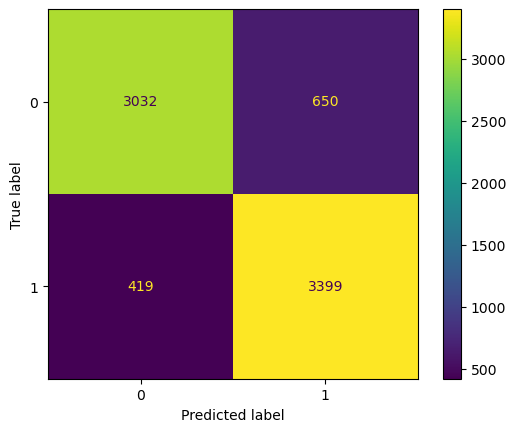

In [30]:
gbc = GradientBoostingClassifier(random_state=666, n_estimators=200, max_depth=8, learning_rate=.5)
gbc.fit(x_train, y_train)

# Confusion matrix:
# plot_confusion_matrix(gbc, x_test, y_test) #old command
ConfusionMatrixDisplay.from_estimator(gbc, x_test, y_test)

# Evaluation metrics:
y_pred = gbc.predict(x_test)
gbc_score = accuracy_score(y_test, y_pred)
print(f'GB Accuracy Score = {gbc_score}')
print('GB Classification Report:')
print(classification_report(y_test, y_pred))

In [31]:
df = pd.read_csv('HW9_income.csv')
df.shape
df.head()

,Age,Workclass,FNLWGT,Education,EducationLevel,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary
0,62,Local-gov,68268,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
1,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,36,Private,185405,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,>50K
3,64,Private,258006,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,Cuba,<=50K
4,28,Self-emp-not-inc,39388,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


In [32]:
df['HighIncome'] = df['Salary'].map(lambda x : 1 if '>50K' in x else 0)
df['HighIncome'].value_counts()

0    3084
1     916
Name: HighIncome, dtype: int64

In [33]:
df['Gender'] = df['Sex'].map(lambda x : 1 if 'Male' in x else 0)
df['Gender'].value_counts()

1    2690
0    1310
Name: Gender, dtype: int64

## Feature selection 

In [34]:
# Eliminating variables with many missing values:
missing_frac=df.isnull().mean().sort_values(ascending=False)
drop_list=sorted(list(missing_frac[missing_frac>0.3].index))
df.drop(labels=drop_list, axis=1, inplace=True)
df.shape

(4000, 17)

In [35]:
# Eliminating variables based on intuition: (this is subjective)
keep_list=['Gender', 'EducationLevel', 'HoursPerWeek', 'CapitalGain','Age', 'HighIncome', 'Occupation',
           'Workclass', 'MaritalStatus', 'Relationship']
df=df[keep_list]
df.shape

(4000, 10)

In [36]:
# Eliminating features based on correlations with the output variable: Keep if correlation is above 10%
# NOTE: this applies only to numeric featues
corr=df.corr()
corr

,Gender,EducationLevel,HoursPerWeek,CapitalGain,Age,HighIncome
Gender,1.000000,0.012809,0.207148,0.067635,0.094933,0.233259
EducationLevel,0.012809,1.000000,0.165150,0.128875,0.035994,0.327435
HoursPerWeek,0.207148,0.165150,1.000000,0.095176,0.069024,0.225311
CapitalGain,0.067635,0.128875,0.095176,1.000000,0.056872,0.229374
Age,0.094933,0.035994,0.069024,0.056872,1.000000,0.217113
HighIncome,0.233259,0.327435,0.225311,0.229374,0.217113,1.000000


In [37]:
corr_chagedoff=abs(corr['HighIncome'])
drop_list_corr=sorted(list(corr_chagedoff[corr_chagedoff<0.10].index))
corr_chagedoff_reset = corr_chagedoff.reset_index(drop=True)
print(drop_list_corr)

[]


In [38]:
df.drop(labels=drop_list_corr, axis=1, inplace=True)
df.shape

(4000, 10)

In [39]:
df['Workclass'].value_counts()

 Private             2756
 Self-emp-not-inc     328
 Local-gov            262
 ?                    229
 State-gov            157
 Self-emp-inc         148
 Federal-gov          117
 Without-pay            2
 Never-worked           1
Name: Workclass, dtype: int64

In [40]:
df['Relationship'].value_counts()

 Husband           1618
 Not-in-family     1019
 Own-child          647
 Unmarried          429
 Wife               173
 Other-relative     114
Name: Relationship, dtype: int64

In [41]:
# Create a categorical boolean mask:
cat_mask=df.dtypes==object

# Filter categorical columns using the mask and turn them into a list:
cat_cols=df.columns[cat_mask].tolist()
cat_cols

['Occupation', 'Workclass', 'MaritalStatus', 'Relationship']

In [42]:
df['Occupation_code']=LabelEncoder().fit_transform(df.Occupation)
df['Workclass_code']=LabelEncoder().fit_transform(df.Workclass)
df['MaritalStatus_code']=LabelEncoder().fit_transform(df.MaritalStatus)
df['Relationship_code']=LabelEncoder().fit_transform(df.Relationship)
df.describe()

,Gender,EducationLevel,HoursPerWeek,CapitalGain,Age,HighIncome,Occupation_code,Workclass_code,MaritalStatus_code,Relationship_code
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.67250,10.057750,40.413000,1087.994500,38.463500,0.229000,6.573500,3.872750,2.611250,1.442250
std,0.46936,2.564383,12.427693,7633.716387,13.778775,0.420242,4.252366,1.467002,1.510031,1.594459
min,0.00000,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,9.000000,40.000000,0.000000,27.000000,0.000000,3.000000,4.000000,2.000000,0.000000
50%,1.00000,10.000000,40.000000,0.000000,37.000000,0.000000,7.000000,4.000000,2.000000,1.000000
75%,1.00000,12.000000,45.000000,0.000000,47.000000,0.000000,10.000000,4.000000,4.000000,3.000000
max,1.00000,16.000000,99.000000,99999.000000,90.000000,1.000000,14.000000,8.000000,6.000000,5.000000


In [43]:
df.drop(cat_cols, axis=1, inplace=True)
df.shape

(4000, 10)

In [44]:
df.head()

,Gender,EducationLevel,HoursPerWeek,CapitalGain,Age,HighIncome,Occupation_code,Workclass_code,MaritalStatus_code,Relationship_code
0,1,9,40,0,62,0,14,2,2,0
1,1,9,40,0,50,1,3,4,2,0
2,1,9,50,0,36,1,1,4,2,0
3,0,10,40,0,64,0,1,4,6,1
4,1,11,60,0,28,0,5,6,2,0


## Splitting data

In [45]:
y = df['HighIncome']
x = df.loc[:, df.columns != 'HighIncome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=800)
y_test.sample(3)

2433    0
2919    0
1916    0
Name: HighIncome, dtype: int64

CART Accuracy Score = 0.812
CART Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       783
           1       0.56      0.59      0.57       217

    accuracy                           0.81      1000
   macro avg       0.72      0.73      0.73      1000
weighted avg       0.81      0.81      0.81      1000



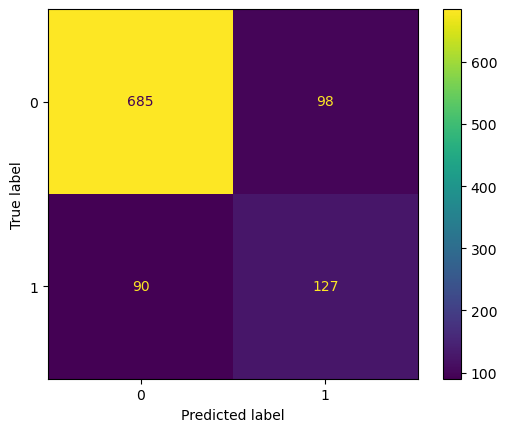

In [46]:
dtc = DecisionTreeClassifier(random_state=666) #max_depth; class_weight='balanced'
dtc.fit(x_train, y_train)

# Confusion matrix:
# plot_confusion_matrix(dtc, x_test, y_test) #old command
ConfusionMatrixDisplay.from_estimator(dtc, x_test, y_test)

# Evaluation metrics:
y_pred = dtc.predict(x_test)
dtc_score = accuracy_score(y_test, y_pred)
print(f'CART Accuracy Score = {dtc_score}')
print('CART Classification Report:')
print(classification_report(y_test, y_pred))

In [47]:
dtc.feature_importances_

array([0.00300611, 0.14871269, 0.1379384 , 0.13561478, 0.21033969,
       0.08802351, 0.05666844, 0.01250253, 0.20719385])

In [48]:
#Display feature importances:
for name, val in zip(x_train.columns, dtc.feature_importances_):
    print(f'{name} importance = {val:.2%}')

Gender importance = 0.30%
EducationLevel importance = 14.87%
HoursPerWeek importance = 13.79%
CapitalGain importance = 13.56%
Age importance = 21.03%
Occupation_code importance = 8.80%
Workclass_code importance = 5.67%
MaritalStatus_code importance = 1.25%
Relationship_code importance = 20.72%


<AxesSubplot:>

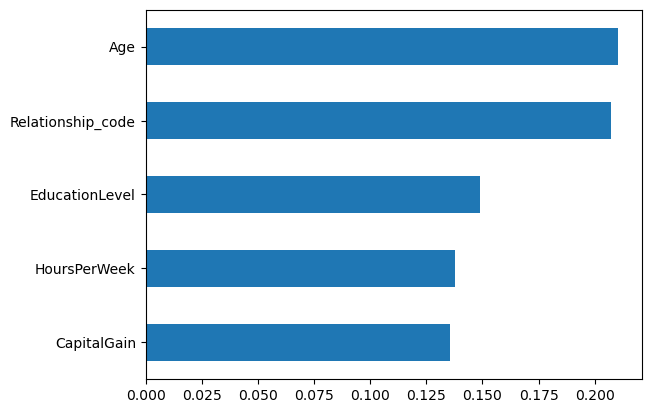

In [49]:
#Plotting feature importances:
feat_imp=pd.Series(dtc.feature_importances_, index=x_train.columns)
feat_imp.nlargest(5).sort_values().plot(kind='barh') #nlargest(5) to see the 5 most important features

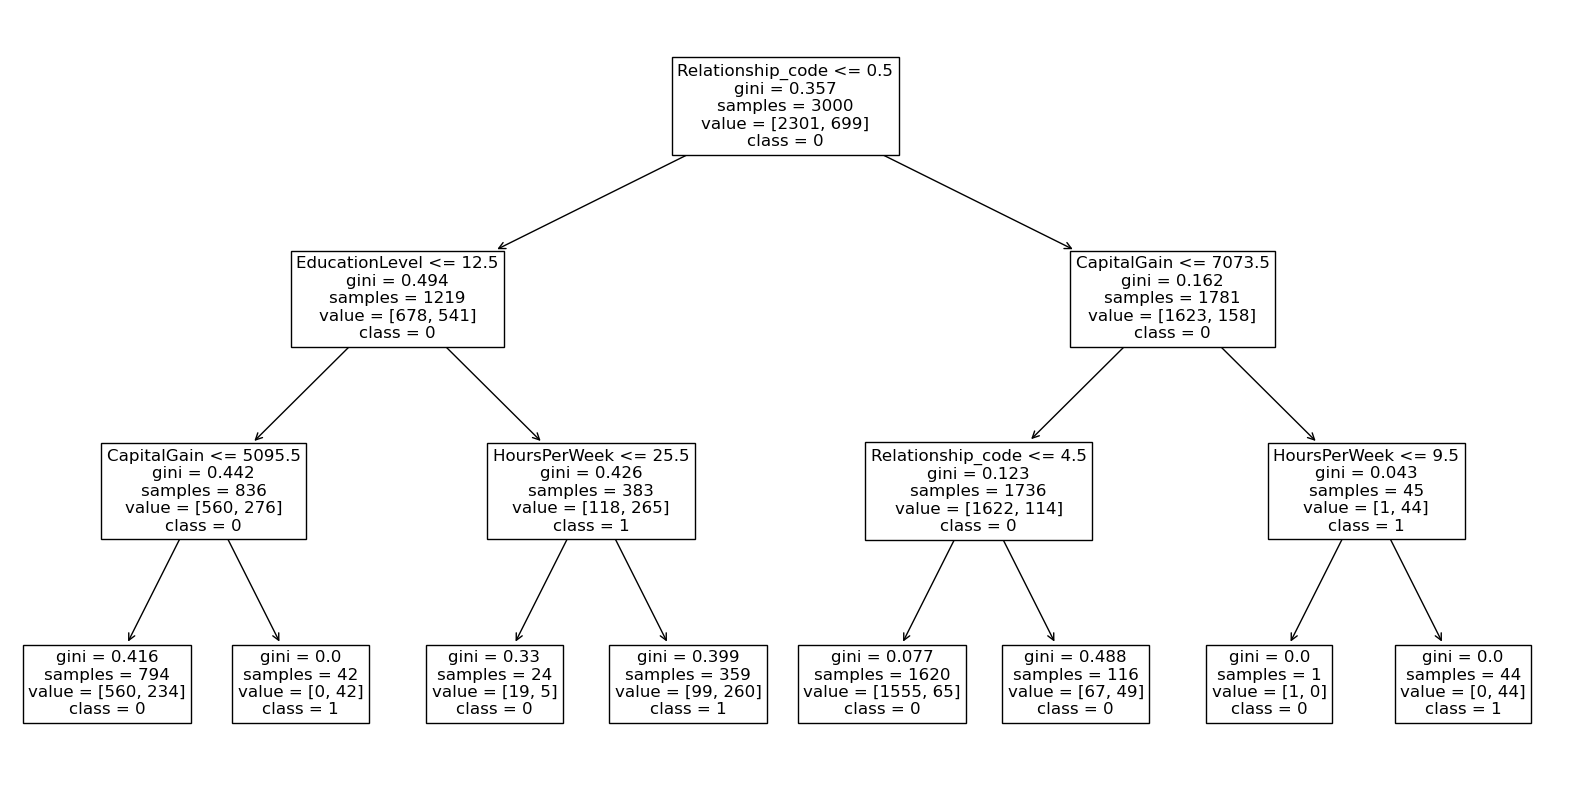

In [50]:
dtc = DecisionTreeClassifier(random_state=666, max_depth=3) #max_depth; class_weight='balanced'
dtc.fit(x_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=x_train.columns, class_names=['0','1'], fontsize=12);

## Random Forest

RF Accuracy Score = 0.852
RF Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       783
           1       0.69      0.57      0.62       217

    accuracy                           0.85      1000
   macro avg       0.79      0.75      0.77      1000
weighted avg       0.84      0.85      0.85      1000



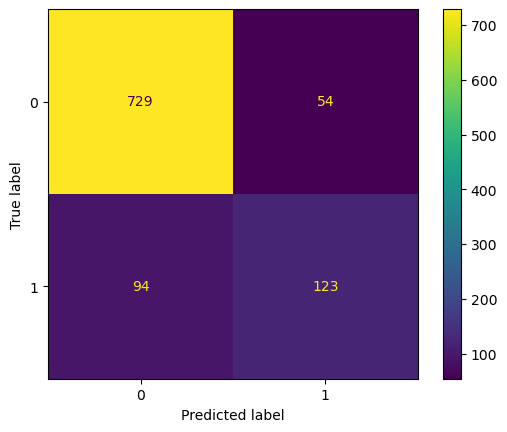

In [51]:
rfc = RandomForestClassifier(random_state=666, n_estimators=100, max_features=3)
rfc.fit(x_train, y_train)

# Confusion matrix:
# plot_confusion_matrix(rfc, x_test, y_test) #old command
ConfusionMatrixDisplay.from_estimator(rfc, x_test, y_test)

# Evaluation metrics:
y_pred = rfc.predict(x_test)
rfc_score = accuracy_score(y_test, y_pred)
print(f'RF Accuracy Score = {rfc_score}')
print('RF Classification Report:')
print(classification_report(y_test, y_pred))

<AxesSubplot:>

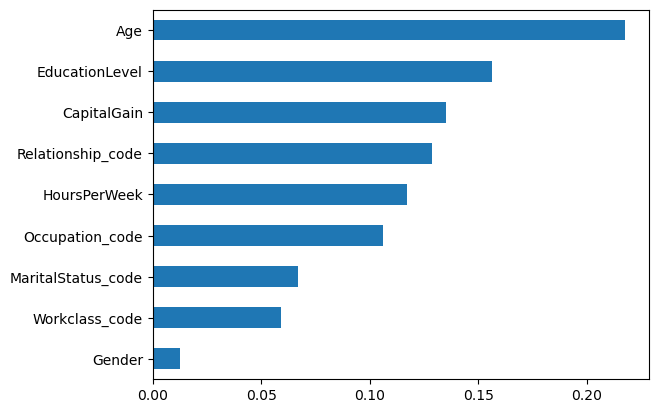

In [52]:
#Plotting feature importances:
feat_imp=pd.Series(rfc.feature_importances_, index=x_train.columns)
feat_imp.nlargest(9).sort_values().plot(kind='barh')

## Extra Trees

ET Accuracy Score = 0.822
ET Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       783
           1       0.60      0.54      0.57       217

    accuracy                           0.82      1000
   macro avg       0.74      0.72      0.73      1000
weighted avg       0.82      0.82      0.82      1000



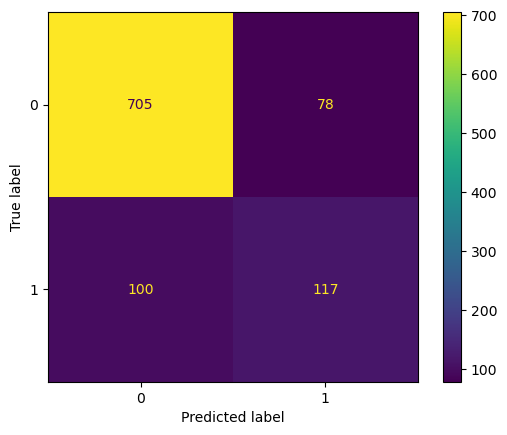

In [53]:
etc = ExtraTreesClassifier(random_state=666, n_estimators=5) #in this example, lower n_estimator (number of trees) performs better.
etc.fit(x_train, y_train)

# Confusion matrix:
# plot_confusion_matrix(etc, x_test, y_test) #old command
ConfusionMatrixDisplay.from_estimator(etc, x_test, y_test)

# Evaluation metrics:
y_pred = etc.predict(x_test)
etc_score = accuracy_score(y_test, y_pred)
print(f'ET Accuracy Score = {etc_score}')
print('ET Classification Report:')
print(classification_report(y_test, y_pred))

## Gradient Boosting

GB Accuracy Score = 0.83
GB Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       783
           1       0.62      0.55      0.58       217

    accuracy                           0.83      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.82      0.83      0.83      1000



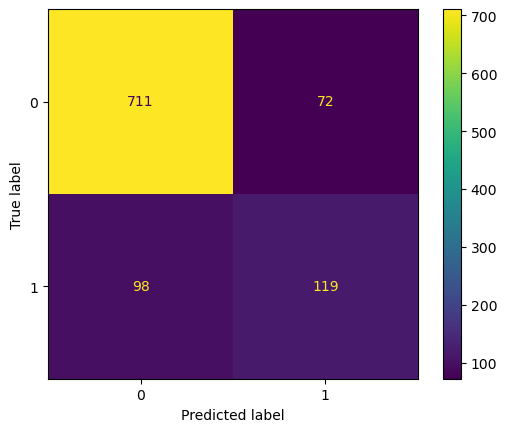

In [54]:
gbc = GradientBoostingClassifier(random_state=666, n_estimators=200, max_depth=8, learning_rate=.5)
gbc.fit(x_train, y_train)

# Confusion matrix:
# plot_confusion_matrix(gbc, x_test, y_test) #old command
ConfusionMatrixDisplay.from_estimator(gbc, x_test, y_test)

# Evaluation metrics:
y_pred = gbc.predict(x_test)
gbc_score = accuracy_score(y_test, y_pred)
print(f'GB Accuracy Score = {gbc_score}')
print('GB Classification Report:')
print(classification_report(y_test, y_pred))